In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats


# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
df_bitcoin = pd.read_csv("Bitcoin_data.csv")
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_bitcoin.set_index('Date', inplace=True)
df_bitcoin.head(5)

,Unnamed: 0,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2019-07-15,1,10257.84,11052.77,9992.01,10895.09,"25,384,047,207","194,147,627,475"
2019-07-14,2,11381.02,11451.20,10234.58,10256.06,"22,486,000,001","182,741,933,552"
2019-07-13,3,11813.13,11841.96,10908.48,11392.38,"21,042,616,384","202,968,191,001"
2019-07-12,4,11354.30,11905.49,11179.14,11815.99,"23,534,692,797","210,494,417,832"
2019-07-11,5,12139.71,12144.62,11158.92,11358.66,"28,595,327,690","202,324,174,692"


In [2]:
df_bitcoin.count()

Unnamed: 0    4539
Open          4539
High          4539
Low           4539
Close         4539
Volume        4539
Market Cap    4539
dtype: int64

In [3]:
df_bitcoin.dtypes

Unnamed: 0      int64
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [4]:
#df_bitcoin.Volume = df_bitcoin.Volume.astype(int)
df_bitcoin.columns[df_bitcoin.isna().any()].tolist()

[]

In [5]:
df_bitcoin["Change"] = df_bitcoin.Close - df_bitcoin.Open
df_bitcoin

,Unnamed: 0,Open,High,Low,Close,Volume,Market Cap,Change
Date,,,,,,,,
2019-07-15,1,10257.84,11052.77,9992.01,10895.09,"25,384,047,207","194,147,627,475",637.25
2019-07-14,2,11381.02,11451.20,10234.58,10256.06,"22,486,000,001","182,741,933,552",-1124.96
2019-07-13,3,11813.13,11841.96,10908.48,11392.38,"21,042,616,384","202,968,191,001",-420.75
2019-07-12,4,11354.30,11905.49,11179.14,11815.99,"23,534,692,797","210,494,417,832",461.69
2019-07-11,5,12139.71,12144.62,11158.92,11358.66,"28,595,327,690","202,324,174,692",-781.05
...,...,...,...,...,...,...,...,...
2013-05-01,2267,139.00,139.89,107.72,116.99,-,"1,298,954,594",-22.01
2013-04-30,2268,144.00,146.93,134.05,139.00,-,"1,542,813,125",-5.00
2013-04-29,2269,134.44,147.49,134.00,144.54,-,"1,603,768,865",10.10


In [6]:
max(df_bitcoin.index)


Timestamp('2019-07-15 00:00:00')

In [7]:
min(df_bitcoin.index)

Timestamp('2013-04-28 00:00:00')

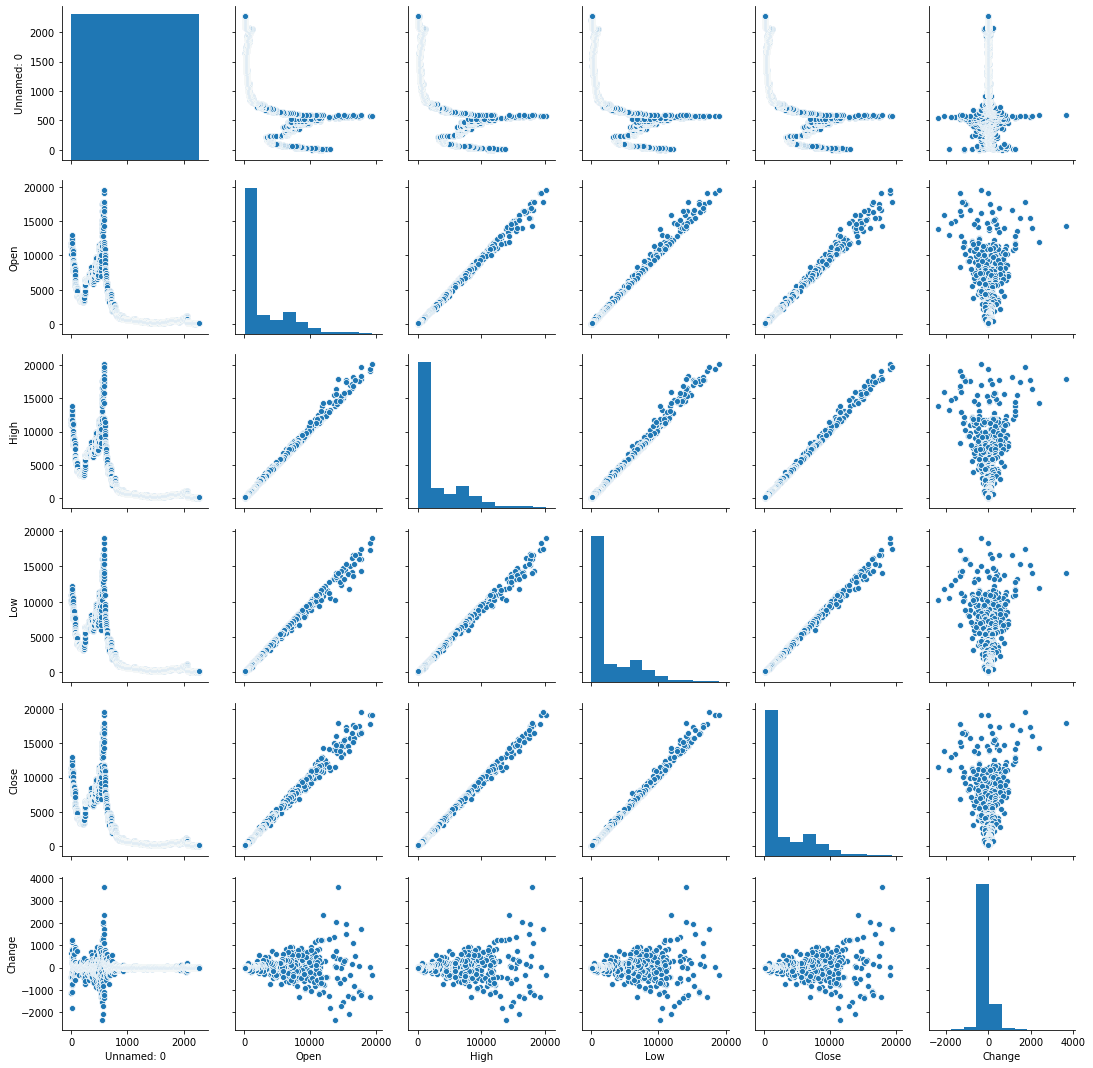

In [56]:
sns.pairplot(df_bitcoin)

In [15]:
auto_correlations = df_bitcoin.corr()
auto_correlations

,Unnamed: 0,Open,High,Low,Close,Change
Unnamed: 0,1.000000,-0.713264,-0.707873,-0.722475,-0.713743,-0.017101
Open,-0.713264,1.000000,0.998881,0.998097,0.997579,-0.020478
High,-0.707873,0.998881,1.000000,0.997885,0.999080,0.017178
Low,-0.722475,0.998097,0.997885,1.000000,0.998735,0.023485
Close,-0.713743,0.997579,0.999080,0.998735,1.000000,0.049098
Change,-0.017101,-0.020478,0.017178,0.023485,0.049098,1.000000


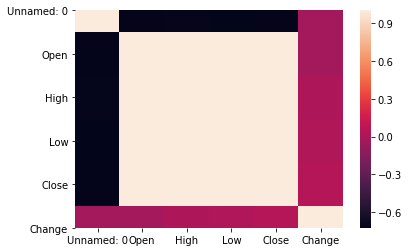

In [17]:
sns.heatmap(auto_correlations)

Text(0, 0.5, 'Value Per Standard Unit, USD')

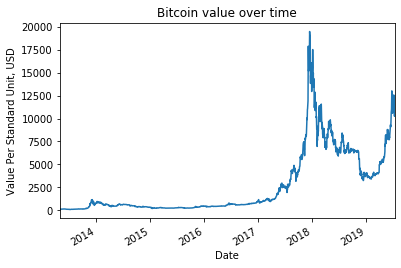

In [9]:
bitcoinPrices = df_bitcoin.Close
bitcoinOpen = df_bitcoin.Open
bitcoinChange= df_bitcoin.Change
bitcoinPrices.plot(title="Bitcoin value over time") #5
sns.mpl.pyplot.ylabel("Value Per Standard Unit, USD") #6

Text(0, 0.5, 'Value Change Standard Unit, USD')

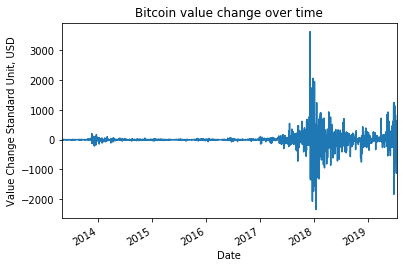

In [10]:
bitcoinChange.plot(title="Bitcoin value change over time")
#sns.mpl.pyplot.fill_between(bitcoinChange.index, y1=bitcoinChange, color='r', alpha=0.2)
sns.mpl.pyplot.ylabel("Value Change Standard Unit, USD")

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Value Per Standard Unit, USD')

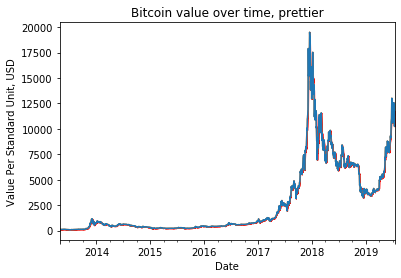

In [11]:
bitcoinPrices = df_bitcoin.Close
bitcoinGroups = bitcoinPrices.groupby("Date")
bitcoinGroups 
bitcoinMeans = bitcoinGroups.agg(np.mean)
bitcoinErrs = bitcoinGroups.agg(stats.sem)



bitcoinMeans.plot(yerr=bitcoinErrs,title="Bitcoin value over time") 
sns.mpl.pyplot.ylabel("Value Per Standard Unit, USD") 

bitcoinMeans.plot(title="Bitcoin value over time, prettier")
sns.mpl.pyplot.fill_between(x=bitcoinMeans.index, y1=bitcoinMeans-bitcoinErrs, y2=bitcoinMeans+bitcoinErrs, color='r', alpha=1)
sns.mpl.pyplot.ylabel("Value Per Standard Unit, USD")


In [12]:
tenDayRollingbitcoinMean = bitcoinMeans.rolling(window = 7,min_periods=4).mean()
tenDayRollingbitcoinStd  = bitcoinMeans.rolling(window = 7, min_periods=4).std()

tenDayRollingbitcoinMean


Date
2013-04-28             NaN
2013-04-29             NaN
2013-04-30             NaN
2013-05-01      133.685000
2013-05-02      127.990000
                  ...     
2019-07-11    11716.114286
2019-07-12    11835.761429
2019-07-13    11862.022857
2019-07-14    11691.338571
2019-07-15    11492.642857
Name: Close, Length: 2270, dtype: float64

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


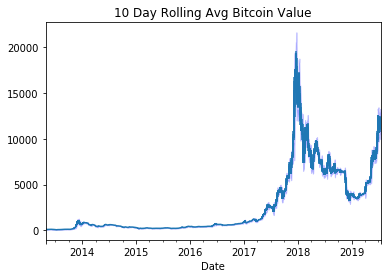

In [41]:
tenDayRollingbitcoinMean.plot(yerr=tenDayRollingbitcoinStd, title= "10 Day Rolling Avg Bitcoin Value")
sns.mpl.pyplot.fill_between(tenDayRollingbitcoinMean.index, tenDayRollingbitcoinMean-2*tenDayRollingbitcoinStd, tenDayRollingbitcoinMean+2*tenDayRollingbitcoinStd, color='b', alpha=0.2)

In [52]:
mult_feature_cols = ['Open', 'High', 'Low','Change']
X_mult = df_bitcoin[mult_feature_cols]
y_mult = df_bitcoin.Close


multiple_linreg = LinearRegression()
multiple_linreg.fit(X_mult, y_mult)

coeffs = multiple_linreg.coef_
intercept =  multiple_linreg.intercept_

print(intercept)
print(coeffs)

1.8189894035458565e-12
[ 1.00000000e+00 -1.00934902e-15  2.84881066e-16  1.00000000e+00]


In [53]:
list(zip(mult_feature_cols, multiple_linreg.coef_))

[('Open', 1.0000000000000002),
 ('High', -1.0093490247754617e-15),
 ('Low', 2.848810656027551e-16),
 ('Change', 1.0)]

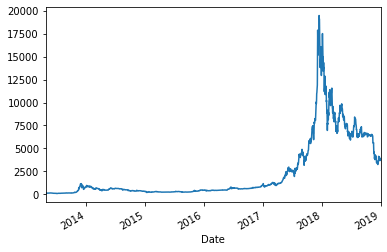

In [54]:
df_bitcoin_train = df_bitcoin.loc[:"2019-01-1",["Close"]]
df_bitcoin_test = df_bitcoin.loc["2019-01-2":,["Close"]]
df_bitcoin_train['Close'].plot()

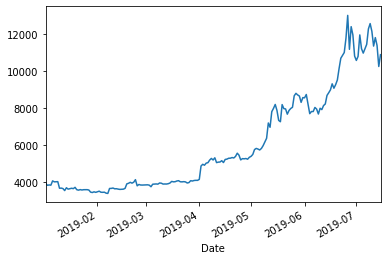

In [55]:
df_bitcoin_test['Close'].plot()